In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Majority rule (a.k.a. voting rule)

In [2]:
c = np.array([[0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0]])

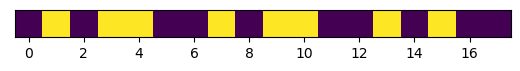

In [3]:
plt.imshow(c, vmin=0, vmax=1)
plt.yticks([]);

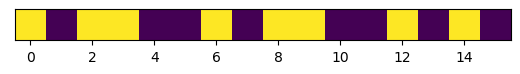

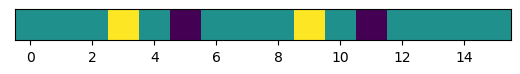

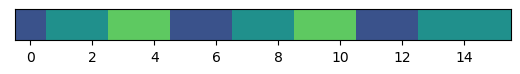

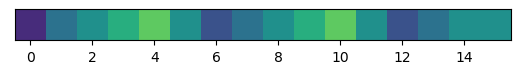

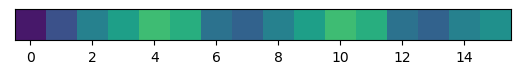

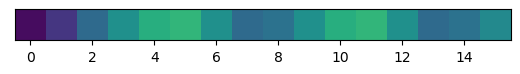

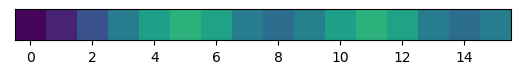

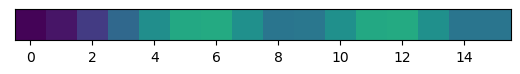

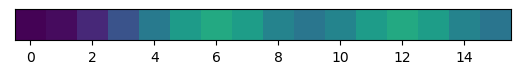

In [4]:
c = np.array([[0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0]])
for t in range(1, 10):
    plt.imshow(c[:, 1:-1], vmin=0, vmax=1)
    plt.yticks([])
    plt.show()
    
    c_prev = c.copy()
    c_empty = []
    for i in range(1, c.shape[1]-1):
        mean = np.mean(c_prev[:, i-1:i+1])
        c_empty.append(mean)
    c = np.array([[0] + c_empty + [0]])

## Animate cellular automata

In [5]:
n = 100
p = 0.1

config = np.where(np.random.rand(n, n) < p, 1, 0)

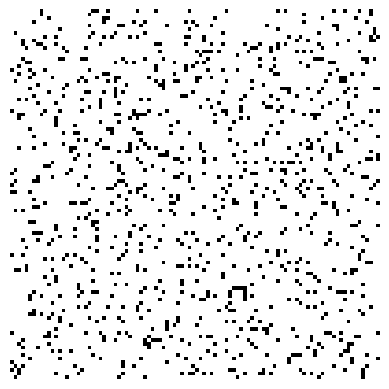

In [6]:
plt.cla()
plt.imshow(config, vmin = 0, vmax = 1, cmap = plt.cm.binary)
plt.axis(False);

In [7]:
from itertools import product

In [8]:
nextconfig = np.zeros([n, n])

In [9]:
for x, y in list(product(range(n), range(n))):
    count = 0
    for dx, dy in list(product([-1, 0, 1], [-1, 0, 1])):
        count += config[(x + dx) % n, (y + dy) % n]
    nextconfig[x, y] = 1 if count >= 4 else 0
config, nextconfig = nextconfig, config

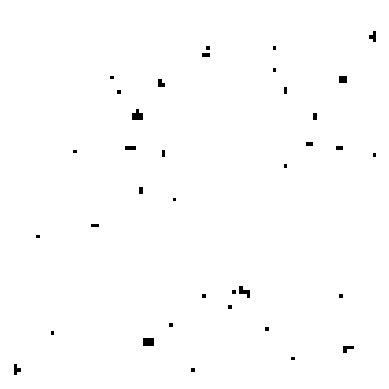

In [11]:
plt.cla()
plt.imshow(config, vmin = 0, vmax = 1, cmap = plt.cm.binary)
plt.axis(False);

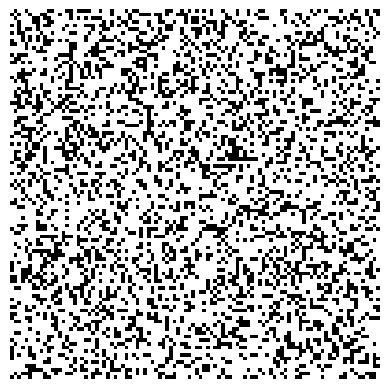

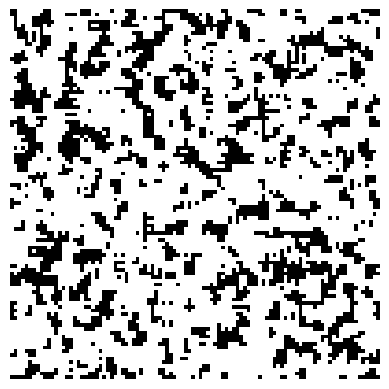

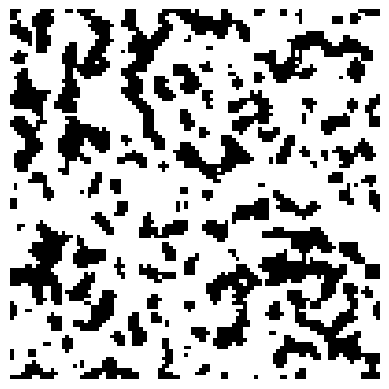

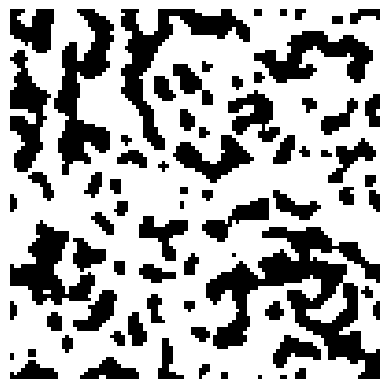

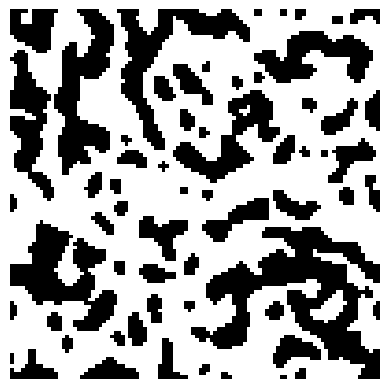

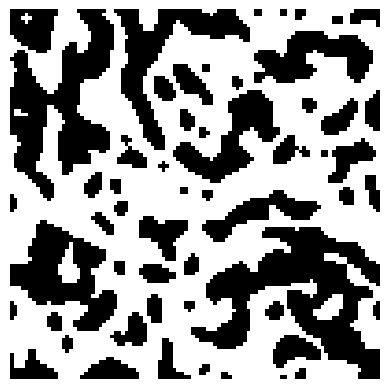

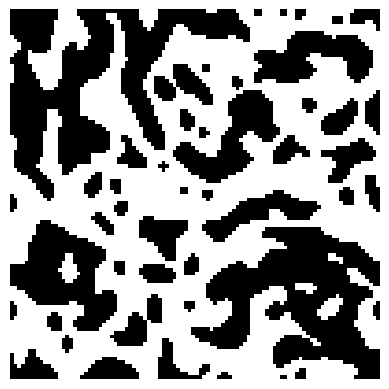

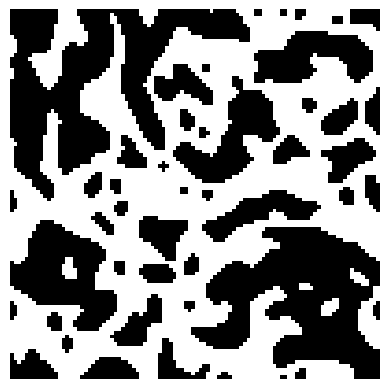

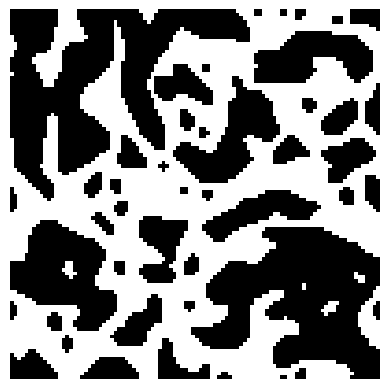

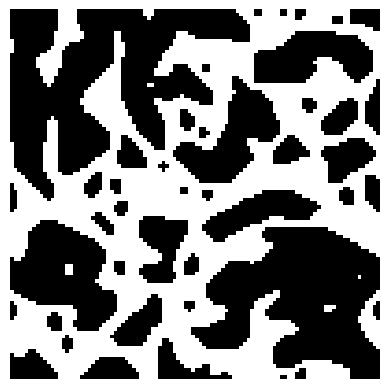

In [43]:
n = 100
p = 0.314

config = np.where(np.random.rand(n, n) < p, 1, 0)
nextconfig = np.zeros([n, n])

for _ in range(10):
    plt.cla()
    plt.imshow(config, vmin = 0, vmax = 1, cmap = plt.cm.binary)
    plt.axis(False)
    plt.show()
    for x, y in list(product(range(n), range(n))):
        count = 0
        for dx, dy in list(product([-1, 0, 1], [-1, 0, 1])):
            count += config[(x + dx) % n, (y + dy) % n]
        nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config
    

In [35]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')

In [126]:
n = 100
p = 0.27
np.random.seed(42)

config = np.where(np.random.rand(n, n) < p, 1, 0)
nextconfig = np.zeros([n, n])

fig = plt.figure()
im = plt.imshow(config, vmin = 0, vmax = 1, cmap = plt.cm.binary, animated=True)
plt.axis(False)
plt.close()

def drawframe(*args):
    # plt.cla()
    # plt.imshow(config, vmin = 0, vmax = 1, cmap = plt.cm.binary)
    # plt.axis(False)
    # plt.show()
    global config, nextconfig
    im.set_array(config)
    for x, y in list(product(range(n), range(n))):
        count = 0
        for dx, dy in list(product([-1, 0, 1], [-1, 0, 1])):
            count += config[(x + dx) % n, (y + dy) % n]
        nextconfig[x, y] = 1 if count >= 4 else 0
    
    config, nextconfig = nextconfig, config
    
    return im,

In [127]:
anim = animation.FuncAnimation(fig, drawframe, frames=42, interval=400, blit=True)

In [128]:
anim